In [2]:
import cv2
import numpy as np
from commonFunctions import *
# import io
import io 

In [33]:
def shadow_removalDialate(img):
    # img2 = cv2.imread(f'../Dataset_0-5/men/{num}/4_men (49).JPG')
    img2 = cv2.resize(img, (256, 256))
    
    img_hls = cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)

    # define lower and upper bounds for blue color in HLS format
    lower_blue = np.array([0, 0, 60])
    upper_blue = np.array([20, 255, 255])

    # create a mask for blue color in HLS format
    mask = cv2.inRange(img_hls, lower_blue, upper_blue)
    # daialation
    kernel = np.ones((3,3),np.uint8)
    mask = cv2.dilate(mask,kernel,iterations = 8)
    # apply the mask to the original image
    result = cv2.bitwise_and(img2, img2, mask=mask)
    show_images([img2, mask, result], ["Original Image", "dialation", "masked"])
    # io.imshow(img2)
    return result

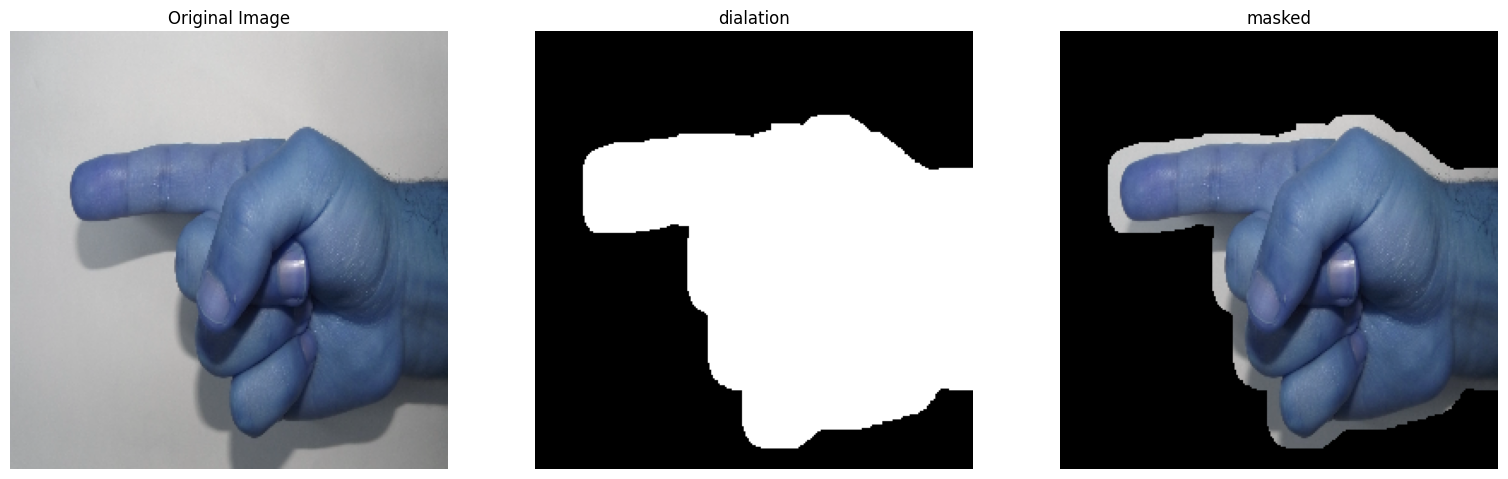

In [6]:
img2 = cv2.imread('../Dataset_0-5/men/1/1_men (2).JPG')
img2 = cv2.resize(img2, (256, 256))
result_image=shadow_removalDialate(img2)

In [8]:
def preprocessing(img,img2):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to enhance contrast and remove lighting effects
    equalized = cv2.equalizeHist(gray)
    # io.imshow(equalized)
    # # Find the contours of the binary image
    contours, hierarchy = cv2.findContours(equalized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)

    # # Draw the largest contour on the original image
    cv2.drawContours(img2, [max_contour], 0, (0, 255, 0), 2)
    # io.imshow(img2)
    # # Show the image with the largest contour drawn
    # # Create a bounding box around the hand
    x, y, w, h = cv2.boundingRect(max_contour)

    # # Crop the image to the bounding box around the hand
    hand = equalized[y:y+h, x:x+w]
    img3 = cv2.resize(hand, (256, 256))
    # io.imshow(img3)

    return img3

In [ ]:
def walid(img):
    # Load the input image
    img = cv2.imread('../Dataset_0-5/men/1/1_men (3).JPG')
    # show_images([img])
    # # Image Rescaling
    img2 = cv2.resize(img, (320, 180))
    # show_images([img2])

    # Image Enhancement
    img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.equalizeHist(img_gray)
    # show_images([img_gray])

    # Background Subtraction
    fgbg = cv2.createBackgroundSubtractorMOG2()
    fgmask = fgbg.apply(img_gray)
    Background_Subtraction = cv2.bitwise_and(img_gray, img_gray, mask=fgmask)
    # show_images([Background_Subtraction])

    # Noise Reduction
    Noise_Reduction = cv2.medianBlur(img_gray, 5)
    # show_images([Noise_Reduction])
    return Noise_Reduction


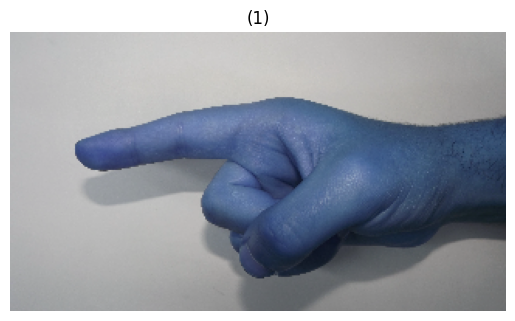

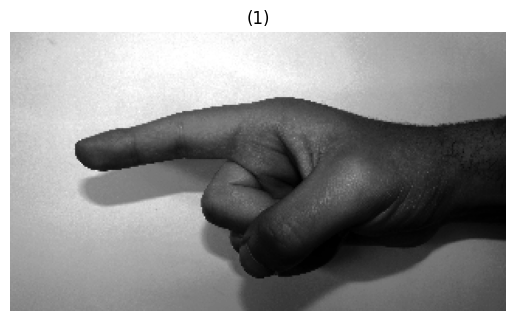

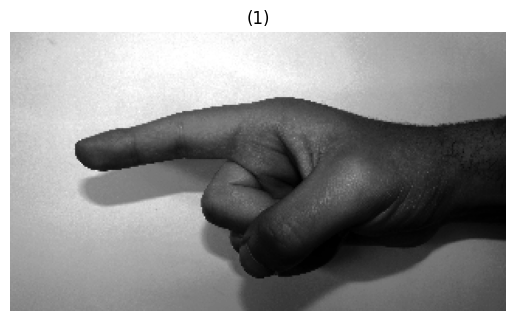

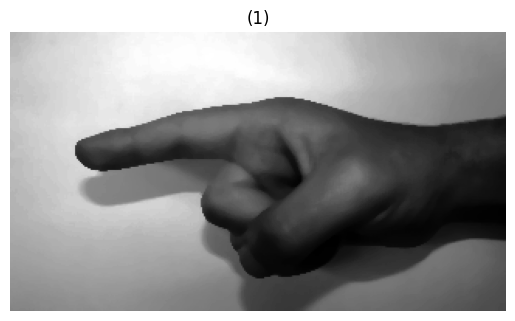

In [24]:
# Load the input image
img = cv2.imread('../Dataset_0-5/men/1/1_men (3).JPG')
# show_images([img])
# # Image Rescaling
img2 = cv2.resize(img, (320, 180))
# show_images([img2])

# Image Enhancement
img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img_gray = cv2.equalizeHist(img_gray)
# show_images([img_gray])

# Background Subtraction
fgbg = cv2.createBackgroundSubtractorMOG2()
fgmask = fgbg.apply(img_gray)
Background_Subtraction = cv2.bitwise_and(img_gray, img_gray, mask=fgmask)
# show_images([Background_Subtraction])

# Noise Reduction
Noise_Reduction = cv2.medianBlur(img_gray, 5)
# show_images([Noise_Reduction])


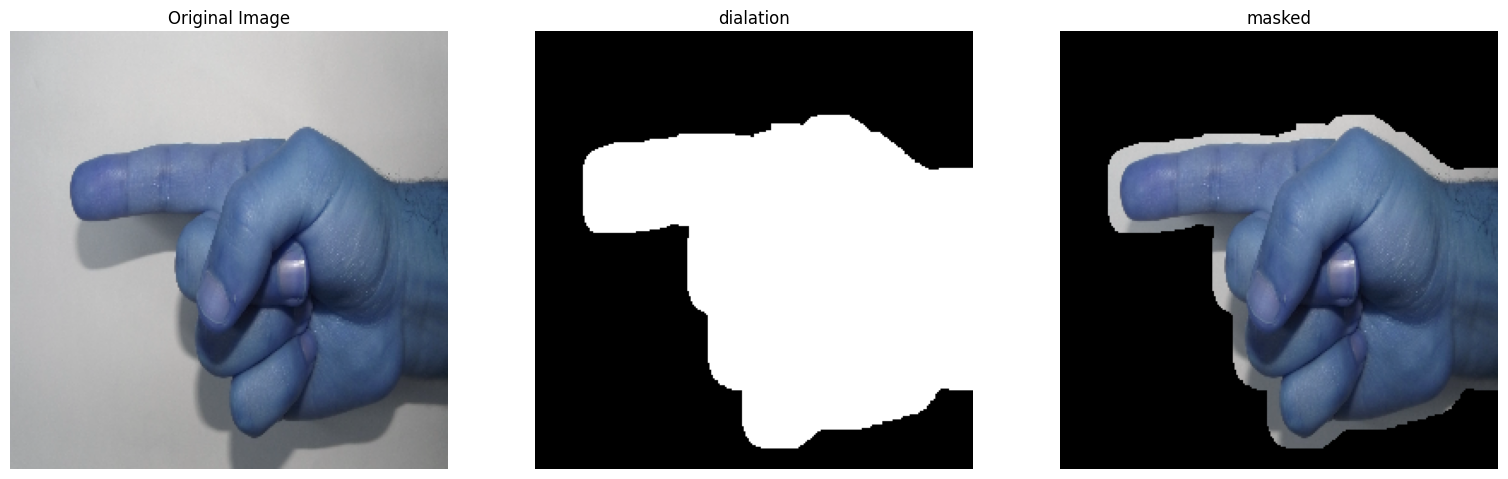

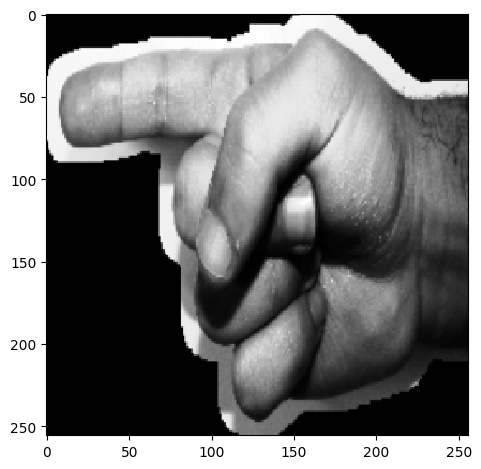

In [45]:
img2 = cv2.imread('../Dataset_0-5/men/1/1_men (2).JPG')
img2 = cv2.resize(img2, (256, 256))
result_image=shadow_removalDialate(img2)
preprocessed_image=preprocessing(result_image,img2)
io.imshow(preprocessed_image)

In [32]:
def modified_walid(img):
    img2 = cv2.resize(img, (320, 180))
    # shadow_removalDialateimg=shadow_removalDialate(img2)
    img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    result_image = cv2.equalizeHist(img_gray)
    # show_images([result_image])
    img_hls = cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)
    # define lower and upper bounds for blue color in HLS format
    lower_blue = np.array([0, 0, 60])
    upper_blue = np.array([20, 255, 255])
    # create a mask for blue color in HLS format
    mask = cv2.inRange(img_hls, lower_blue, upper_blue)
    # daialation
    kernel = np.ones((3,3),np.uint8)
    mask = cv2.dilate(mask,kernel,iterations = 8)
    # apply the mask to the original image
    result = cv2.bitwise_and(result_image, result_image, mask=mask)
    # show_images([img2, mask, result], ["Original Image", "dialation", "masked"])
    # apply canny edge detection
    return result

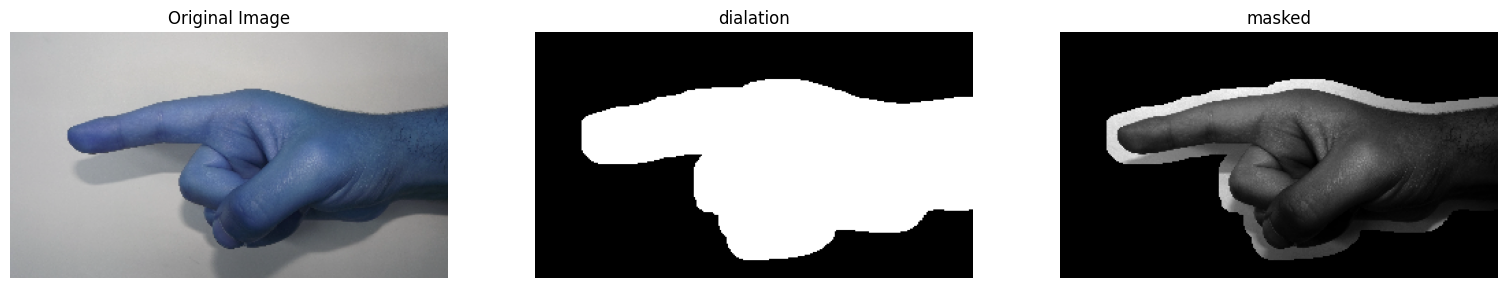

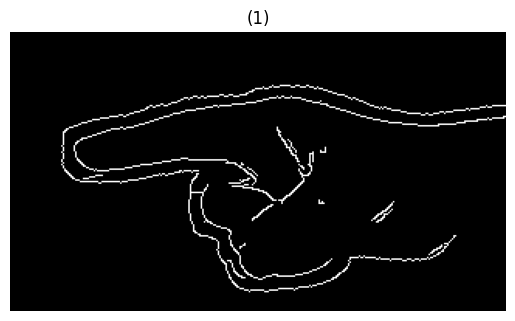

In [28]:
img = cv2.imread('../Dataset_0-5/men/1/1_men (3).JPG')
img2 = cv2.resize(img, (320, 180))
# shadow_removalDialateimg=shadow_removalDialate(img2)
img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
result_image = cv2.equalizeHist(img_gray)
# show_images([result_image])
img_hls = cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)
# define lower and upper bounds for blue color in HLS format
lower_blue = np.array([0, 0, 60])
upper_blue = np.array([20, 255, 255])
# create a mask for blue color in HLS format
mask = cv2.inRange(img_hls, lower_blue, upper_blue)
# daialation
kernel = np.ones((3,3),np.uint8)
mask = cv2.dilate(mask,kernel,iterations = 8)
# apply the mask to the original image
result = cv2.bitwise_and(result_image, result_image, mask=mask)
show_images([img2, mask, result], ["Original Image", "dialation", "masked"])
# apply canny edge detection


In [27]:
# def shadow_removalDialate(img):
#     # Remove shadows using a hand-specific shadow removal algorithm
#     mog = cv2.createBackgroundSubtractorMOG2()
#     fg_mask = mog.apply(img)
#     img_no_shadow = cv2.bitwise_and(img, img, mask=fg_mask)
#     show_images([img, img_no_shadow], ["Original Image", "No Shadow"])
#     # Segment the hand from the background using background subtraction
#     bg_sub = cv2.createBackgroundSubtractorMOG2(history=0, varThreshold=50, detectShadows=False)
#     fg_mask = bg_sub.apply(img_no_shadow)
#     fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
#     show_images([img_no_shadow, fg_mask], ["No Shadow", "Background Subtraction"])
    
#     fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
#     fg_mask = cv2.dilate(fg_mask, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50)), iterations=2)
    
#     # Segment the skin color from the image
#     img_hsv = cv2.cvtColor(img_no_shadow, cv2.COLOR_BGR2HSV)
#     lower_skin = np.array([0, 20, 70], dtype=np.uint8)
#     upper_skin = np.array([20, 255, 255], dtype=np.uint8)
#     skin_mask = cv2.inRange(img_hsv, lower_skin, upper_skin)
#     show_images([fg_mask, skin_mask], ["fg_mask", "Skin Mask"])
#     # Combine the two masks
#     # mask = cv2.bitwise_and(fg_mask, skin_mask)
    
#     # Apply the mask to the original image
#     result = cv2.bitwise_and(img, img, mask=skin_mask)
#     show_images([img, fg_mask, result], ["Original Image", "Mask", "Result"])
#     return result


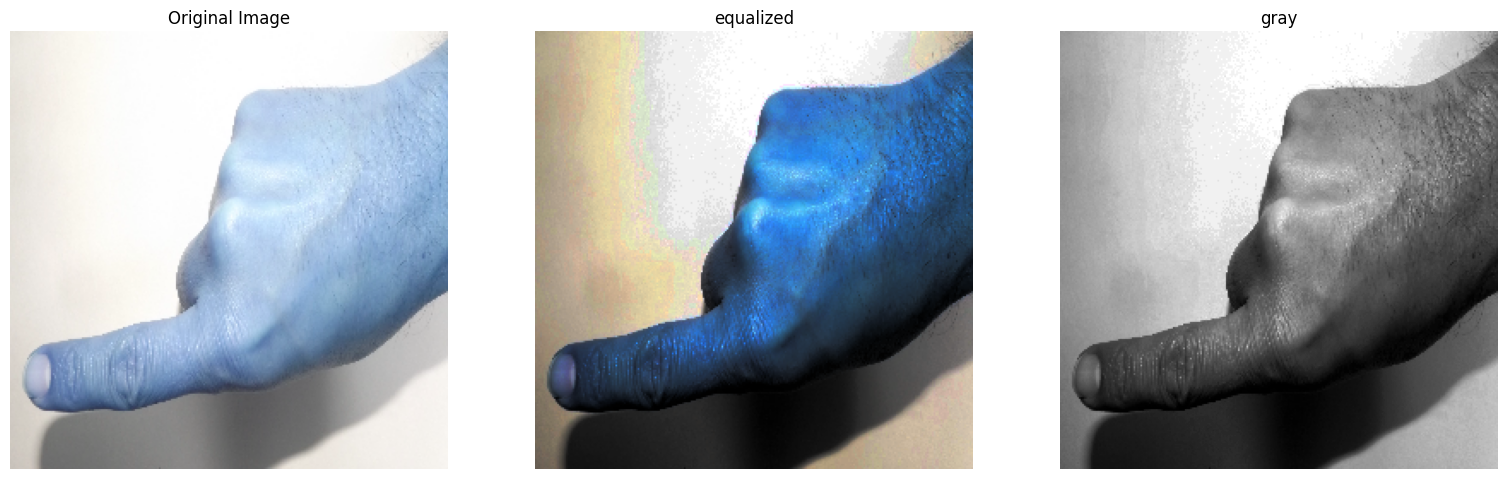

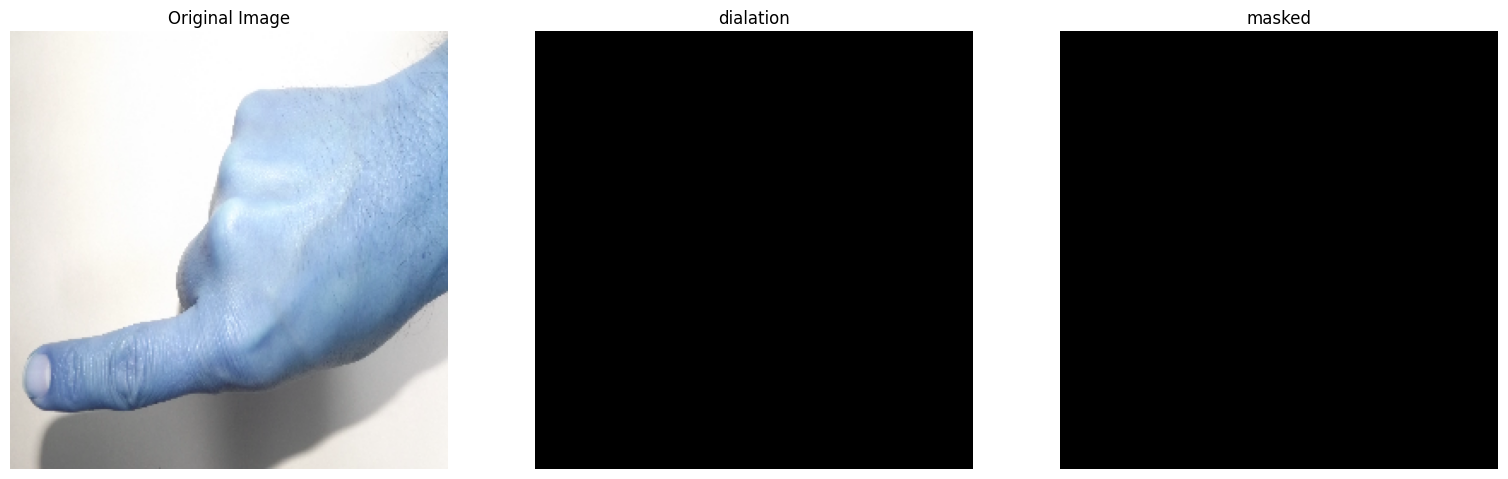

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [36]:
img = cv2.imread('../Dataset_0-5/men/1/1_men (35).JPG')
# shadow_removalDialate(img)
shadow_removalDialate2(img)
